# Managing Files on Datalake Volume with Zettapark

Singdata Lakehouse实现了数据湖与数据仓库的统一管理。以下内容将向您展示如何在数据湖中进行文件管理，包括上传（PUT）、下载（GET）和列举（LIST）等基本文件操作。

Singdata Lakehouse提供两种数据湖管理方式：外部数据湖管理和内部数据湖管理。在Singdata Lakehouse中，所有数据湖存储都将映射为Volume对象。其中，外部Volume的存储由客户自行管理，而内部Volume的存储则由Singdata全面负责，分为用户卷（USER VOLUME）和表卷（TABLE VOLUME）两大类。在本向导中，我们将使用用户卷（USER VOLUME）作为数据湖的存储。

Singdata Lakehouse Zettapark的Python API为用户提供了便捷的数据湖文件和数据仓库表操作接口，实现了Lakehouse内数据湖湖和数据仓开发与管理的无缝对接。通过这一API，我们进一步优化了数据湖与数据仓库的整合体验，助力用户高效地进行数据处理和分析。

In [1]:
# !pip install clickzetta_zettapark_python  -U -i https://pypi.tuna.tsinghua.edu.cn/simple

In [2]:
from clickzetta.zettapark.session import Session
import json,requests
import os
from datetime import datetime

## 创建到Lakehouse的会话

In [3]:
import json

# 从配置文件中读取参数
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

print("Connecting to Lakehouse.....\n")

# 创建会话
session = Session.builder.configs(config).create()

print("Connected and context as below...\n")

# print(session.sql("SELECT current_instance_id(), current_workspace(),current_workspace_id(), current_schema(), current_user(),current_user_id(), current_vcluster()").collect())

Connecting to Lakehouse.....

Connected and context as below...



## 将文件PUT到Lakehouse数据湖Internal User Volume

USER VOLUME为当前用户专有的Internal Volume，是Lakehouse为用户提供的Volume。该VOLUME开箱即用，无需创建即可在User Volume上进行文件操作。

### 往USER VOLUME上传文件前，先删除USER VOLUME里的所有文件方便检查。

In [4]:
session.sql("REMOVE USER VOLUME SUBDIRECTORY '/'").show()

---------------------
|result_message     |
---------------------
|OPERATION SUCCEED  |
---------------------



### 查看USER VOLUME里的文件，结果列表为空，确定没有文件

In [5]:
session.sql("LIST USER VOLUME").show(10)

---------------------------------------------------
|relative_path  |url  |size  |last_modified_time  |
---------------------------------------------------
|               |     |      |                    |
---------------------------------------------------



### 将文件PUT到数据湖的Internal User Volume

In [6]:
for filename in os.listdir("data/"):
        if filename.endswith("csv.gz"):
            file_path = os.path.join("data/", filename)
            session.file.put(file_path,"volume:user://~/csvgz/")
        if filename.endswith(".csv"):
            file_path = os.path.join("data/", filename)
            session.file.put(file_path,"volume:user://~/csv/")
        if filename.endswith(".json"):
            file_path = os.path.join("data/", filename)
            session.file.put(file_path,"volume:user://~/json/")
        if filename.endswith(".png"):
            file_path = os.path.join("data/", filename)
            session.file.put(file_path,"volume:user://~/png/")
        if filename.endswith(".jpg"):
            file_path = os.path.join("data/", filename)
            session.file.put(file_path,"volume:user://~/jpg/")
        if filename.endswith(".pdf"):
            file_path = os.path.join("data/", filename)
            session.file.put(file_path,"volume:user://~/pdf/")

### 查看USER VOLUME里的文件，结果列表里就是VOLUME的文件列表，确定上传成功

In [7]:
session.sql("LIST USER VOLUME").show(100)

--------------------------------------------------------------------------------------------------------------------------------------------------
|relative_path                                       |url                                                 |size      |last_modified_time         |
--------------------------------------------------------------------------------------------------------------------------------------------------
|csv/lift_tickets_data.csv                           |oss://cz-lh-sh-prod/123/workspaces/qiliang_ws_d...  |21101094  |2025-02-28 11:52:39+08:00  |
|csvgz/lift_tickets_data.csv.gz                      |oss://cz-lh-sh-prod/123/workspaces/qiliang_ws_d...  |9717050   |2025-02-28 11:52:38+08:00  |
|json/lift_tickets_data.json                         |oss://cz-lh-sh-prod/123/workspaces/qiliang_ws_d...  |50291401  |2025-02-28 11:52:42+08:00  |
|pdf/Unstructured_data_ETL_from_S3_to_Singdata_L...  |oss://cz-lh-sh-prod/123/workspaces/qiliang_ws_d...  |2074955   |

## Get and view the image on Internal Volume.

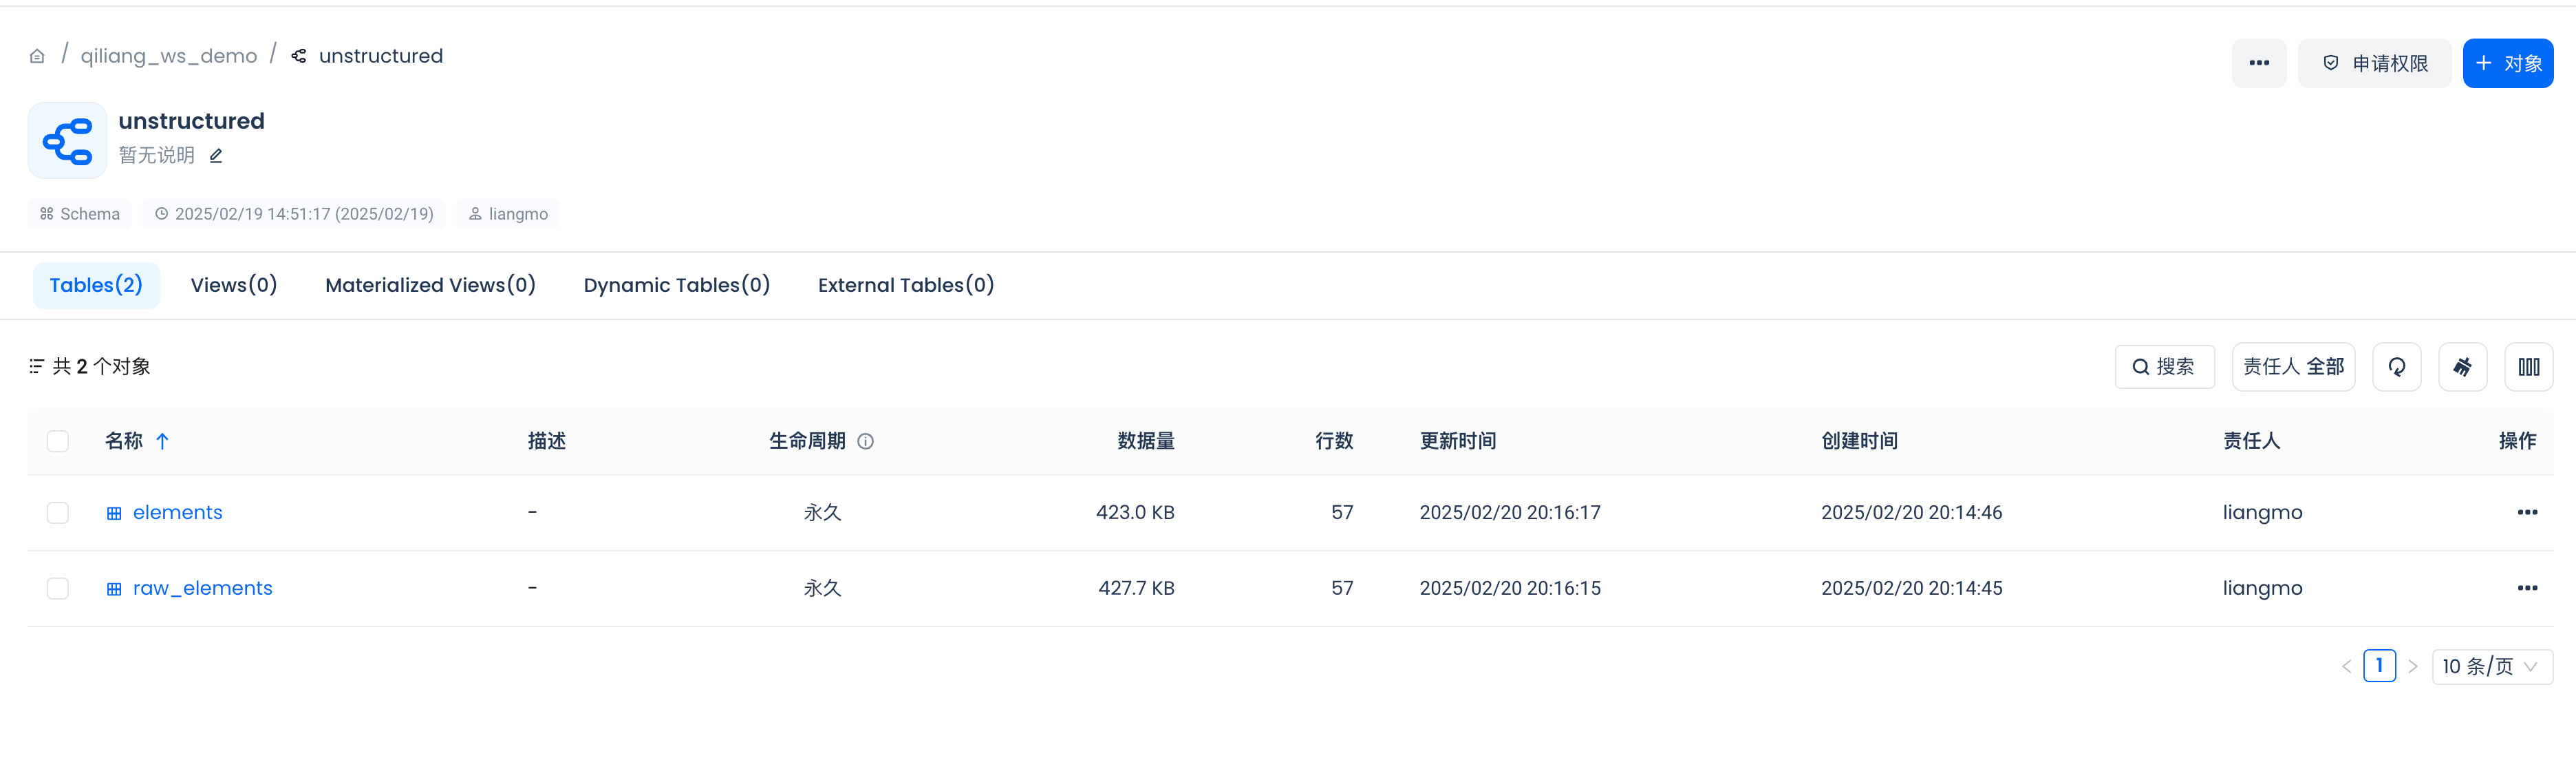

In [8]:
from PIL import Image

# 1. 获取文件到本地（注意路径格式）
source_path = "volume:user://~/png/unstructured_tables.png"
dest_path = "tmp/png/" 
session.file.get(source_path, dest_path)
try:
    img = Image.open(dest_path+"unstructured_tables.png")
except FileNotFoundError:
    print(f"错误：文件 {dest_path} 不存在，请检查路径")
except Exception as e:
    print(f"打开图片失败：{str(e)}")
img

## 关闭会话

In [10]:
session.close()